<a href="https://colab.research.google.com/github/tejasramramesh/Cryptocurrency-prediction-/blob/main/TensorFlow/Tejas/Deep_Learning_HW4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Home Work 4 



Reference:

1) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

2) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

3)

#GPU Check

In [1]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.9.2


In [3]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
5.904669068000203
GPU (s):
0.06787491799968848
GPU speedup over CPU: 86x


#Dependencies

In [4]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten
from librosa.core import stft,istft
import soundfile as sf
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

##Load Data Set

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

print('dimensions of X_train : {}'.format(X_train.shape))
print('dimensions of y_train : {}'.format(y_train.shape))
print('dimensions of X_test  : {}'.format(X_test.shape))
print('dimensions of y_test  : {}'.format(y_test.shape))

dimensions of X_train : (60000, 28, 28)
dimensions of y_train : (60000,)
dimensions of X_test  : (10000, 28, 28)
dimensions of y_test  : (10000,)


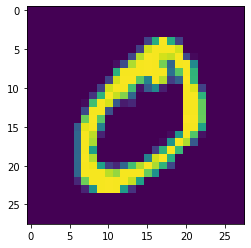

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[1])

##Split Train Data Set to Train and Validation

In [8]:
from sklearn.model_selection import train_test_split

X_train2,X_val,y_train2,y_val = train_test_split(X_train,y_train,train_size = 0.8,random_state= None, shuffle=False, stratify=None)

print('dimensions of X_train2 : {}'.format(X_train2.shape))
print('dimensions of y_train2 : {}'.format(y_train2.shape))
print('dimensions of X_val  : {}'.format(X_val.shape))
print('dimensions of y_val  : {}'.format(y_val.shape))

dimensions of X_train2 : (48000, 28, 28)
dimensions of y_train2 : (48000,)
dimensions of X_val  : (12000, 28, 28)
dimensions of y_val  : (12000,)


In [9]:
X_train2 = X_train2.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

##Model

Scale data to range of [0,1] (X_train2,X_val,X_test) and one hot encode all images (Y).

In [10]:

'''X_train2_sc = X_train2/255    # Broadcast this operation to all values
X_val_sc = X_val/255 
X_test_sc = X_test/255'''

'X_train2_sc = X_train2/255    # Broadcast this operation to all values\nX_val_sc = X_val/255 \nX_test_sc = X_test/255'

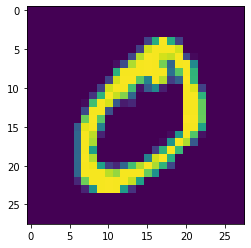

In [11]:
plt.imshow(X_train2[1])

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28,28)),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer1"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer2"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer3"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer4"),
    tf.keras.layers.Dense(units=1024,activation='relu', name="target_layer5"),
    tf.keras.layers.Dense(units=10,activation='softmax')
  ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 target_layer1 (Dense)       (None, 1024)              803840    
                                                                 
 target_layer2 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer3 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer4 (Dense)       (None, 1024)              1049600   
                                                                 
 target_layer5 (Dense)       (None, 1024)              1049600   
                                                                 
 dense (Dense)               (None, 10)                1

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [15]:
history = model.fit(X_train2,y_train2,epochs = 30, batch_size = 256 )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


188/188 [==============================] - 3s 10ms/step - loss: 4.3650 - accuracy: 0.8418
Epoch 2/30
188/188 [==============================] - 1s 7ms/step - loss: 0.1179 - accuracy: 0.9635
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0745 - accuracy: 0.9765
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0613 - accuracy: 0.9803
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0488 - accuracy: 0.9844
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0436 - accuracy: 0.9865
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 8/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0443 - accuracy: 0.9861
Epoch 9/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0309 - accuracy: 0.9905
Epoch 10/30
188/188 [==============================] - 1s 5ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 11/

In [16]:
accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1513 - accuracy: 0.9745


In [17]:
print("The Accuracy of the Model is {}".format(accuracy[-1]))

The Accuracy of the Model is 0.9745000004768372


###Save the Model

In [18]:
model_path = '/content/drive/MyDrive/ENGR-E-533 /DATA/HW4/Models/Q1_baselinemodel.h5'

In [19]:
model.save(model_path)

In [20]:
model.layers

In [21]:
length = 0
for i in model.layers:
  length = length + 1
length = length -1 # remove reshape layer as it has no weight
print(length)

6


In [22]:
len(model.layers)

7

###Load Saved Model

In [23]:
model = keras.models.load_model(model_path)

So SVD reduces dimensionality of the weight matrix which essentially is the importance given to each feature and cumulative evaluations taken by the previous nodes.



So Flow:

1. Store all of the weights in a list
2. loop over the length of list and take SVD of each layers weights.
store S V and D to a parent list of S V and D containing the corresponding S ( V or D ) of that layer.
3. Loop for rank of matrix 
4. Call a function to parse S,V and D for that many columns for every layer
5. Multiply them to get layer wise weights
6. Apply the model to it

In [59]:
weight =[]
for i in range(1,length):
  weight_layer = model.get_layer(index = i).get_weights()[0]
  #print("Weight layer is {} and len {} and shape {}".format(i,len(weight_layer),weight_layer.shape))
  print("Weight layer is {}  and shape {}".format(i,weight_layer.shape))
  weight.append(weight_layer)




Weight layer is 1  and shape (784, 1024)
Weight layer is 2  and shape (1024, 1024)
Weight layer is 3  and shape (1024, 1024)
Weight layer is 4  and shape (1024, 1024)
Weight layer is 5  and shape (1024, 1024)


In [27]:
print(len(weight))

5


In [61]:
S = []
V = []
D = []

for i in range(1,length):
  sum, value, direction = tf.linalg.svd(weight[i-1])
  S.append(tf.linalg.diag(sum))
  V.append(tf.transpose(value))
  D.append(direction)

print("S length is ",len(S))

print("Shape of S is layer 0 and onwards  :{0} & {1}".format(S[0].shape,S[1].shape))
print("Shape of V is layer 0 and onwards  :{0} & {1}".format(V[0].shape,V[1].shape))
print("Shape of D is layer 0 and onwards  :{0} & {1}".format(D[0].shape,D[1].shape))


S length is  5
Shape of S is layer 0 and onwards  :(784, 784) & (1024, 1024)
Shape of V is layer 0 and onwards  :(784, 784) & (1024, 1024)
Shape of D is layer 0 and onwards  :(1024, 784) & (1024, 1024)


In [62]:
S1 = S[0][:,:]
print(S1[:10,:10])

tf.Tensor(
[[6.281983  0.        0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        4.589154  0.        0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        4.2182217 0.        0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        4.149649  0.        0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        0.        3.9736855 0.        0.
  0.        0.        0.       ]
 [0.        0.        0.        0.        0.        3.8392446 0.
  0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        3.8109903
  0.        0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  3.665675  0.        0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        3.6366358 0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  0.        0.        3.616989 ]], 

We now have the weights and SVD components with S as a diagonal matrix.

1. Now we need to loop over the rank given.

2. Subset each Component ( S V and D) to the rank.


3. Calculate the weight for each layer using the S,V and D  for that subset rank. 

4. Use the new weights for model 

In [48]:
ranks = [10,20,50,100,200,784] 
# d_full is consideration of all eigenvector in D hence process all columns in S,V and D

In [33]:
model_length = len(model.layers)


In [65]:
bias =[]
for i in range(1,length):
  bias_layer = model.get_layer(index = i).get_weights()[1]
  #print("Weight layer is {} and len {} and shape {}".format(i,len(weight_layer),weight_layer.shape))
  print("bias layer is {}  and shape {}".format(i,bias_layer.shape))
  bias.append(bias_layer)

bias layer is 1  and shape (1024,)
bias layer is 2  and shape (1024,)
bias layer is 3  and shape (1024,)
bias layer is 4  and shape (1024,)
bias layer is 5  and shape (1024,)


In [67]:
B1 = bias[0]
B2 = bias[1]
B3 = bias[2]
B4 = bias[3]
B5 = bias[4]


In [68]:
accuracy = []

for rank in ranks:
  print(type(rank))
  S1 = S[0][:,:]
  V1 = V[0][:,:]
  D1 = D[0][:,:]
  W1 = tf.matmul(tf.matmul(D1[:, :rank], S1[:rank, :rank]), V1[:rank, :])

  S2 = S[1][:,:]
  V2 = V[1][:,:]
  D2 = D[1][:,:]
  W2 = tf.matmul(tf.matmul(D2[:, :rank], S2[:rank, :rank]), V2[:rank, :])

  S3 = S[2][:,:]
  V3 = V[2][:,:]
  D3 = D[2][:,:]
  W3 = tf.matmul(tf.matmul(D3[:, :rank], S3[:rank, :rank]), V3[:rank, :])

  S4 = S[3][:,:]
  V4 = V[3][:,:]
  D4 = D[3][:,:]
  W4 = tf.matmul(tf.matmul(D4[:, :rank], S4[:rank, :rank]), V4[:rank, :])

  S5 = S[4][:,:]
  V5 = V[4][:,:]
  D5 = D[4][:,:]
  W5 = tf.matmul(tf.matmul(D5[:, :rank], S5[:rank, :rank]), V5[:rank, :])



  model.get_layer(index=1).set_weights([W1,B1])
  model.get_layer(index=2).set_weights([W2,B2])
  model.get_layer(index=3).set_weights([W3,B3])
  model.get_layer(index=4).set_weights([W4,B4])
  model.get_layer(index=5).set_weights([W5,B5])

  acc = model.evaluate(X_test,y_test,verbose = 1)
  accuracy.append(acc[1])

<class 'int'>


ValueError: ignored

In [41]:
accuracy =[]
for rank in ranks :
  S_rank =[]
  D_rank = []
  V_rank = []
  if i == 'd_full':
    S_rank = [ s_index for s_index in S]
    D_rank = [ d_index for d_index in D]
    V_rank = [v_index.numpy().T for v_index in V]
  else:
    S_rank = [ s_index[:rank,:rank] for s_index in S]
    D_rank = [ d_index[:,:rank] for d_index in D]
    V_rank = [v_index[:,:rank].numpy().T for v_index in V] 
    # In V_rank: We are doing Transpose action later hence it is [:,:rank] if it was after transpose then it would be [:rank,:]
  print(type(S_rank))
  '''
  weights_calc =[]
  bias_calc = []
  for index in range(model_length):
    if index == 6:
      weights_calc.append(model.layers[-1].get_weight()[0])
      bias_calc.append(model.layers[-1].get_weight()[1]) 
    else:
     #weights_calc.append(D_rank[index].np.dot(S_rank[index]).dot(V_rank[index]))
      weights_calc.append(tf.matmul(tf.matmul(D_rank[index], S_rank[index]), V_rank[index]))
      bias_calc.append(bias[index])
  
  model.set_weights(weights_calc)
  acc = model.evaluate(X_test,y_test,verbose = 1)
  accuracy.append(acc[1])

    '''
    




<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


TypeError: ignored

In [43]:
def svd_calc(D):
  if rank == 'd_full':
    s_rank = [s_index for s_index in S]
    d_rank = [u_index for u_index in D]
    v_rank = [v_index.numpy().T for v_index in V]
  else:
    s_rank = [np.diag(s_index[0:rank]) for s_index in S]
    d_rank = [d_index[:,0:rank] for d_index in D]
    v_rank = [v_index[:,0:rank].numpy().T for v_index in V]
  print('Shapes for 1st layer:')
  print('D: {}'.format(d_rank[0].shape))
  print('S: {}'.format(s_rank[0].shape))
  print('V: {}'.format(v_rank[0].shape))

  print('Shapes for 2nd layer:')
  print('D: {}'.format(d_rank[1].shape))
  print('S: {}'.format(s_rank[1].shape))
  print('V: {}'.format(v_rank[1].shape))
  print(len(s_rank))
'''
  weight_calc = []
  for i in range(1,6):
    model.get_layer(index=i).set_weights()
    model.get_layer(index=).set_weights([W2,bias2])
    model.get_layer(index=3).set_weights([W3,bias3])
    model.get_layer(index=4).set_weights([W4,bias4])
    model.get_layer(index=5).set_weights([W5,bias5])



  baseline_model.summary()

  return baseline_model.evaluate(X_test,y_test,verbose=True)[1]'''

'\n  weight_calc = []\n  for i in range(1,6):\n    model.get_layer(index=i).set_weights()\n    model.get_layer(index=).set_weights([W2,bias2])\n    model.get_layer(index=3).set_weights([W3,bias3])\n    model.get_layer(index=4).set_weights([W4,bias4])\n    model.get_layer(index=5).set_weights([W5,bias5])\n\n\n\n  baseline_model.summary()\n\n  return baseline_model.evaluate(X_test,y_test,verbose=True)[1]'